In [1]:
from seagul.rl.ars.ars_np_queue import ARSAgent
from seagul.plot import smooth_bounded_curve
import seagul.envs

import os
import pickle
import torch
import gym
import numpy as np 
import matplotlib.pyplot as plt

env_name = "bball3-v1"
from bball3_env import BBall3Env


def do_rollout_ars(policy):
#     torch.autograd.set_grad_enabled(False)
#     env = BBall3Env(**env_config)
    #env = gym.make(env_name, **env_config)
    obs = env.reset()

    #obs = torch.as_tensor(obs, dtype=torch.float32)

    acts_list = []
    obs1_list = []
    rews_list = []

#     dtype = torch.float32
    act_size = env.action_space.shape[0]
    obs_size = env.observation_space.shape[0]

    done = False
    cur_step = 0

    while not done:
#         acts = policy(obs)
#         obs = torch.as_tensor(obs, dtype=torch.float32)
        ## not sure if this part is right, cause I changed based on the model <-> policy change below
        acts, _, _, _ = policy.step(obs)
#         print(obs)
        obs, rew, done, out = env.step(acts) # --> check this
          
        obs1_list.append(obs)
#         obs = torch.as_tensor(obs, dtype=dtype)

        acts_list.append(acts)
        rews_list.append(rew)
        cur_step += 1

    ep_obs1 = np.array(obs1_list)
    ep_acts = np.stack(acts_list)
    ep_rews = np.stack(rews_list)

#     torch.autograd.set_grad_enabled(True)
    return ep_obs1, ep_acts, ep_rews

/Users/adi/Desktop/DRL/BouncingBall_ModelBasedControl/RL/bball/python/env/lib/python3.8/site-packages/seagul-0.0.1-py3.8.egg/seagul/envs/__init__.py:49: UserWarning: Warning, pybullet envs not installed
  warnings.warn("Warning, pybullet envs not installed")
/Users/adi/Desktop/DRL/BouncingBall_ModelBasedControl/RL/bball/python/env/lib/python3.8/site-packages/seagul-0.0.1-py3.8.egg/seagul/envs/__init__.py:143: UserWarning: Warning, rllib environments not registered
  warnings.warn("Warning, rllib environments not registered")


In [2]:
# print(env_config)

In [3]:
#trial_path = "/home/sgillen/work/bball/data_ars_wc/exp2"
from bball3_env import BBall3Env
env_name = "bball3-v1"
trial_path = "/Users/adi/Desktop/DRL/BouncingBall_ModelBasedControl/RL/bball/python/data_ars2/trial_0"
agent_list = [] 
r_list = [] 

def reward_fn(state, action):
    xpen = np.clip(-(state[4] - .45)**2, -1, 0)
    #ypen = np.clip(-(state[5] - 2)**2, -1, 0)
    ypen = 0.0
    alive = 2.0
    return xpen + ypen + alive


for entry in os.scandir(trial_path):
    if ".ipynb" in entry.path:
        continue
    if "config" in entry.path:
        print(entry.path)
        env_config = pickle.load(open(entry.path, 'rb'))
        continue
        
#     agent_list.append(torch.load(entry.path))
    agent_list.append(pickle.load(open(entry.path, 'rb')))
    print(agent_list)
#     tensor_arg = torch.from_numpy(np.array(agent_list[-1].r_hist))
    r_list.append(agent_list[-1].r_hist)

    
#env = gym.make(env_name, **env_config)
env = BBall3Env(**env_config)

/Users/adi/Desktop/DRL/BouncingBall_ModelBasedControl/RL/bball/python/data_ars2/trial_0/config.pkl


/Users/adi/Desktop/DRL/BouncingBall_ModelBasedControl/RL/bball/python/env/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[[92.02073771899752, 77.47355141082498, 78.01868196316255, 78.34655625107392, 78.59367643077104, 80.57482962659472, 81.20064159308154, 88.03214045189549, 93.60994778405856, 98.96470933315092, 96.99101822241063, 99.65692571043569, 101.40236924408298, 102.5949042842511, 104.35199122015307, 104.69232079278747, 105.2061088427883, 105.20380148382236, 106.76723513908604, 106.08328230276801, 105.56620056171799, 106.7771162122337, 105.56998741880885, 105.92299858959848, 106.95386838064933, 106.43678663959929, 107.29419795328371, 107.12403316696651, 107.80469231223532, 107.29419795328371, 106.95386838064931, 108.14831557591893, 108.99913950750494, 110.02012822540814, 110.02012822540814, 110.19029301172534, 110.02012822540814, 110.87095215699415, 110.70078737067695, 110.36045779804255, 110.53062258435975, 110.87095215699415, 110.87095215699415, 111.04111694331135, 110.70078737067695, 111.38144651594575, 111.21128172962855, 111.55161130226294, 111.21128172962855, 111.04111694331135, 111.381446515

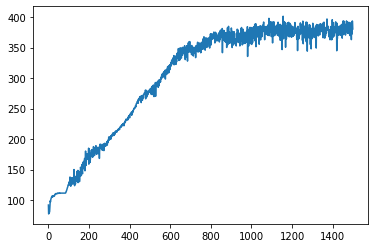

In [4]:
# smooth_bounded_curve(torch.stack(r_list).T)
# smooth_bounded_curve(r_list)
print(r_list)
plt.plot(r_list[0])

[-0.45885263  0.73027013 -1.62203243  0.07456084  1.14875442 -0.77596233
  0.43061748  1.77311487 -0.18762284 -0.278325  ] [0.31573158 0.43632563 1.01127698 0.18597391 0.34650397 1.29225699
 2.84163301 7.34510166 0.4722831  2.25109957]
reward sum: 77.41663114073879


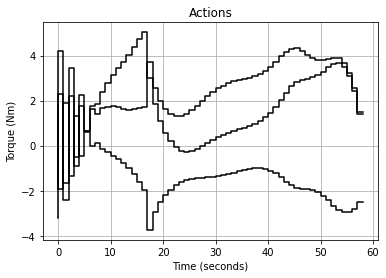

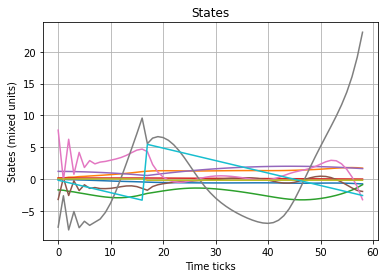

In [5]:
print(agent_list[0].model.state_mean, agent_list[0].model.state_std)
obs_hist, act_hist, rew_hist = do_rollout_ars(agent_list[0].model) # --> do_rollout_ars accepts ARSModel 

#obs_hist, act_hist, rew_hist = do_rollout_ars(agent_list[0].policy) --> ARSAgent has no attribute called policy

print(f"reward sum: {sum(rew_hist)}")

plt.step([i for i in range(act_hist.shape[0])], act_hist, 'k')
plt.title('Actions')
plt.xlabel('Time (seconds)')
plt.ylabel('Torque (Nm)')
plt.grid()
#plt.savefig(script_path + '../figs/act_hist.png')
plt.show(); plt.figure()

plt.plot(obs_hist)

plt.title('States')
plt.xlabel('Time ticks')
plt.ylabel('States (mixed units)')
plt.grid()
#plt.savefig(script_path + '../figs/obs_hist.png')
plt.show()

In [11]:
env.eng.clf()
obs_list = []
for o in obs_hist:
    obs_list.append(o.tolist())
import matlab
tout = matlab.single([float(i) for i in range(len(obs_hist))])
env.animate(tout,matlab.single(obs_list))